#### 1-D Range Search Tree

In [18]:
from collections import defaultdict
from graphviz import Digraph, Source
import random

def add_nodes_edges(graph, node, counter=0):
    if node is not None:
        root = str(counter)
        graph.node(root, str(node.key), fontsize='10')
        if node.left is not None:
            left = str(counter + 1)
            graph.edge(root, left)
            counter = add_nodes_edges(graph, node.left, counter + 1)
        else:
            if node.right is not None:
                # Add a dummy node if the node has no left child
                left = str(counter + 1)
                graph.node(left, "null")
                graph.edge(root, left)
                counter += 1

        if node.right is not None:
            right = str(counter + 1)
            graph.edge(root, right)
            counter = add_nodes_edges(graph, node.right, counter + 1)
        else:
            if node.left is not None:    
                # Add a dummy node if the node has no right child
                right = str(counter + 1)
                graph.node(right, "null")
                graph.edge(root, right)
                counter += 1

    return counter

def visualize_tree(root):
    graph = Digraph()
    add_nodes_edges(graph, root)
    return Source(graph.source)  


In [19]:
class Node:
    def __init__(self, key, data=None, parent=None, left=None, right=None):
        self.key = key
        self.data = data
        self.parent = parent
        self.left = left
        self.right = right

# function for constructing a weight-balanced binary search tree on a set of keys
def create_wbst(P):
    # first sort the keys in acsending order
    P.sort()
    # recursively build the tree
    root = wbst(P, 0, len(P)-1)
    return root

# recursive function for constructing a weight-balanced binary search tree
def wbst(P, lo, hi):
    # find the median of the sorted keys
    m = (lo+hi+1) // 2
    # create a node with the median key
    node = Node(P[m])
    # recursively build the left subtree
    if lo < m:
        node.left = wbst(P, lo, m-1)
    if hi > m:
        node.right = wbst(P, m+1, hi)

    return node        


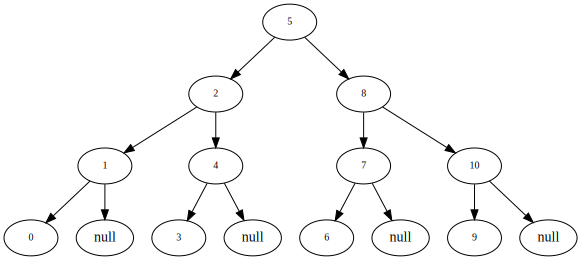

In [22]:
# test the implementation of the WBST
N = 11
P = list(range(N))
random.shuffle(P)
root = create_wbst(P)

visualize_tree(root)